In [27]:
import os
import pandas as pd
import matplotlib
import numpy as np
import scipy.stats as st

os.getcwd()
os.chdir('C:\\Users\meric\Desktop\codes\project')
os.listdir()
# dataset=pd.read_csv('USD_TRY.csv')

dataset=pd.read_excel('ALTIN_TRY.xlsx',sheet_name='Sheet1')

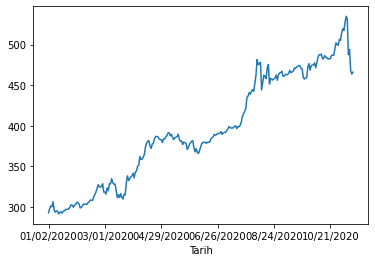

In [28]:
seri = pd.Series(dataset['Kur'].values, index= pd.to_datetime(dataset['Tarih']).dt.strftime('%m/%d/%Y'))
seri.plot()

In [73]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from statsmodels.tsa.api import  SimpleExpSmoothing, Holt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR

# df['Kur'].plot()
# plt.show()

df_train = seri.iloc[:-11]
df_test = seri.iloc[-11:]

ModelDict ={'Model':[],'Fitted':[]}

#döngüye sokucam 0-22 index 23 kayıt
for i in range(2,25):    
    ModelDict["Model"].append(HWES(df_train,trend="add",seasonal_periods=i,seasonal="mul"))
    ModelDict["Fitted"].append(ModelDict["Model"][i-2].fit(optimized=True))
#     print(i) 2-24


    
# model1 = HWES(seri.values,trend="add",seasonal_periods=4,seasonal="mul")
# fitted1 = model1.fit(optimized=True)
# forecast1 = fitted1.forecast(steps=12)
    
ModelPredictDict ={'Model':[],'Forecast':[]}    


for i in range(0,22): 
     ModelPredictDict["Model"].append("Model"+str(i+1))
     ModelPredictDict["Forecast"].append(ModelDict["Fitted"][i].forecast(steps=12).values)

# # print(ModelPredictDict["Forecast"][0][12])
    
ModelPredictDict2 ={'Model':[],'Forecast':[]}        

# DataFrame'e atmak için ModelPredictDict'den forecast
for i in range(0,22): 
    for j in range(0,11): 
      ModelPredictDict2["Model"].append("Model"+str(i+1))
      ModelPredictDict2["Forecast"].append(ModelPredictDict["Forecast"][i][j])

# print(ModelPredictDict2)

df_forecasts=pd.DataFrame.from_dict(ModelPredictDict2)
print(df_forecasts)




       Model    Forecast
0     Model1  506.559415
1     Model1  507.003426
2     Model1  508.200277
3     Model1  508.643071
4     Model1  509.841139
..       ...         ...
237  Model22  513.525261
238  Model22  512.473331
239  Model22  513.827006
240  Model22  514.015407
241  Model22  514.886281

[242 rows x 2 columns]


In [66]:
# df_forecasts.loc[df_forecasts['Model'] == 'Model1'] 
df_forecasts.loc[df_forecasts['Model'].isin(["Model1","Model2"])]['Forecast']

0     506.556306
1     507.748659
2     508.205317
3     509.398865
4     509.854327
5     511.049072
6     511.503338
7     512.699278
8     513.152349
9     514.349484
10    514.801360
11    506.357919
12    508.289553
13    508.537319
14    508.830301
15    510.767334
16    511.012286
17    511.302683
18    513.245115
19    513.487253
20    513.775066
21    515.722897
Name: Forecast, dtype: float64

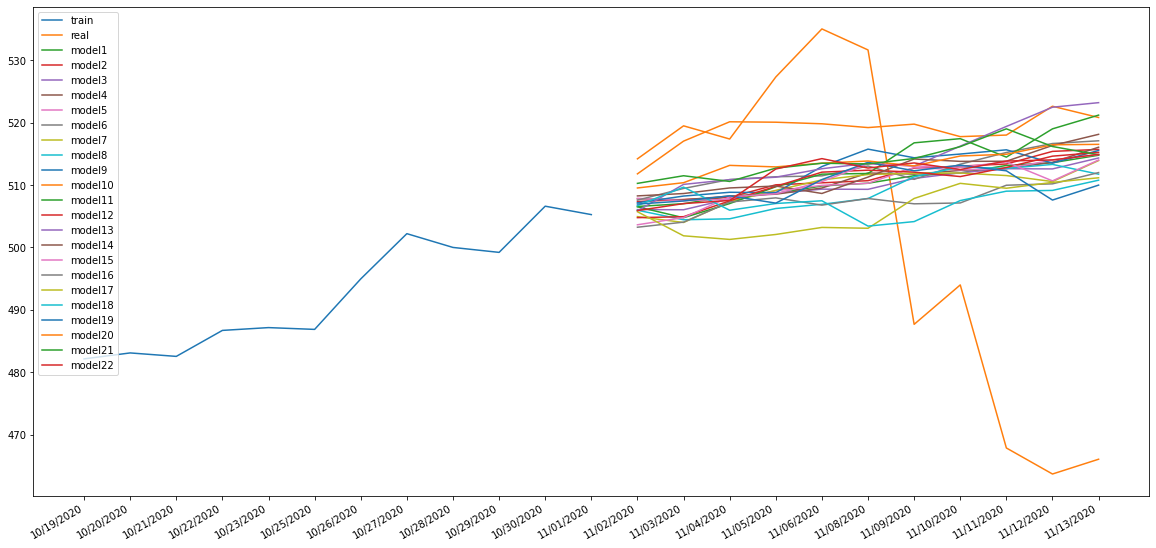

In [74]:
df_train_plot=df_train.iloc[-12:]


#Plotting multiple sets of data
plt.figure(figsize=(20,10))

plt.plot(df_train_plot.index,df_train_plot.values,label='train') # Setting up legends
plt.plot(df_test.index,df_test.values,label='real') # Setting up legends
for i in range (0,22):
 plt.plot(df_test.index,df_forecasts.loc[df_forecasts['Model'].isin(["Model"+str(i+1)])]['Forecast'],label='model'+str(i+1)) # Setting up legends


# # plt.xlabel("X - Axis")
# # plt.ylabel("Y - Axis")

plt.legend(loc=2) #legend location : https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.legend.html
plt.gcf().autofmt_xdate() # x ekseni format düzenlemesi
plt.show()

In [ ]:
df_main = pd.DataFrame({'Tarih':seri.index, 'Kur':seri.values})
df_forecast1=pd.DataFrame({'Tarih':df_test.index, 'Forecast1':forecast1.values})
df_forecast2=pd.DataFrame({'Tarih':df_test.index, 'Forecast2':forecast2.values})
df_forecast3=pd.DataFrame({'Tarih':df_test.index, 'Forecast3':forecast3.values})
df_forecast4=pd.DataFrame({'Tarih':df_test.index, 'Forecast4':forecast4.values})
df_forecast5=pd.DataFrame({'Tarih':df_test.index, 'Forecast5':forecast5.values})
df_forecast6=pd.DataFrame({'Tarih':df_test.index, 'Forecast6':forecast6.values})
df_forecast7=pd.DataFrame({'Tarih':df_test.index, 'Forecast7':forecast7.values})


df_total=pd.merge(df_main, pd.merge(df_forecast1, 
                                   pd.merge(df_forecast2, 
                                            pd.merge(df_forecast3, 
                                                     pd.merge(df_forecast4, 
                                                              pd.merge(df_forecast5, 
                                                                       pd.merge(df_forecast6, df_forecast7,
                                                                                on='Tarih', how='outer'),
                                                                       on='Tarih', how='outer'),
                                                              on='Tarih', how='outer'),
                                                     on='Tarih', how='outer'),
                                            on='Tarih', how='outer'), 
                                   on='Tarih', how='outer'), on='Tarih', how='left')



df_total.to_excel (r'export_dataframe_altın.xlsx', index = False, header=True)

df_total